In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import spline
import numpy as np
import seaborn as sns
import math
import os
import re

ImportError: cannot import name 'spline' from 'scipy.interpolate' (/usr/lib/python3.10/site-packages/scipy/interpolate/__init__.py)

# Pre-processing

In [2]:
#Reading in the data
twitter = pd.read_csv("/course/a2/twitter/RPI_Expertise_2016_Features.csv", low_memory = False)

# Checking if the data is correctly read in
twitter

,userid,utype,domain,followers,friends,total_tweets,years,per_rt,chars,chars_rt,...,Unnamed: 148,Unnamed: 149,Unnamed: 150,Unnamed: 151,Unnamed: 152,Unnamed: 153,Unnamed: 154,Unnamed: 155,Unnamed: 156,Unnamed: 157
0,5480470996,between100-10msgs,Technology,1796.0,165.0,45.0,3.043836,0.844444,77.285714,124.052632,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7280696314,morethan100msgs,Fitness,1699.0,1023.0,352.0,2.126027,1.000000,0.000000,132.244318,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1570594151,morethan100msgs,Technology,6382.0,6244.0,5.0,5.227397,0.000000,61.200000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9433661207,Random,Unknown,622.0,823.0,7.0,5.926027,1.000000,0.000000,139.857143,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6857720553,between100-10msgs,Technology,10766.0,9886.0,1.0,5.043836,1.000000,0.000000,139.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,4249953361,morethan100msgs,Fitness,283.0,65.0,2342.0,1.846575,0.014518,114.548094,122.882353,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5278,6875118252,friend,Fitness,1560.0,1996.0,1.0,7.704110,0.000000,51.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5279,6100001786,mentioned,Science,364.0,396.0,24.0,5.364384,0.208333,101.789474,132.400000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5280,7760138239,friend,Unknown,3703.0,2079.0,1267.0,5.087671,0.125493,64.301444,105.484277,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#Checking the format of the data
twitter.head()
twitter.groupby('domain').count()

,userid,utype,followers,friends,total_tweets,years,per_rt,chars,chars_rt,commas,...,Unnamed: 148,Unnamed: 149,Unnamed: 150,Unnamed: 151,Unnamed: 152,Unnamed: 153,Unnamed: 154,Unnamed: 155,Unnamed: 156,Unnamed: 157
domain,,,,,,,,,,,,,,,,,,,,,
Business,420,420,420,420,420,420,420,420,420,420,...,0,0,0,0,0,0,0,0,0,0
Fitness,1401,1401,1401,1401,1401,1401,1401,1401,1401,1401,...,0,0,0,0,0,0,0,0,0,1
Science,1077,1077,1077,1077,1077,1077,1077,1077,1077,1077,...,0,0,0,0,0,0,0,0,0,0
Technology,1200,1200,1200,1200,1200,1200,1200,1200,1200,1200,...,0,0,0,0,0,0,0,0,0,1
Unknown,1183,1183,1183,1183,1183,1183,1183,1183,1183,1183,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#Preprocessing: Dropping all the unwanted columns
twitter = twitter.iloc[:, :64]
twitter

,userid,utype,domain,followers,friends,total_tweets,years,per_rt,chars,chars_rt,...,org_med_vp,pot_org,rt_avg_d,rt_med,rt_avg_d_np,rt_med_np,rt_avg_d_vp,rt_med_vp,pot_rt,lexco
0,5480470996,between100-10msgs,Technology,1796.0,165.0,45.0,3.043836,0.844444,77.285714,124.052632,...,0.0,0.857143,4.324324,3.0,2.729730,2.0,4.722222,0.0,0.789474,0.012117083
1,7280696314,morethan100msgs,Fitness,1699.0,1023.0,352.0,2.126027,1.000000,0.000000,132.244318,...,0.0,0.000000,5.436090,5.0,3.171875,2.0,4.755102,3.0,0.876812,0.007826719
2,1570594151,morethan100msgs,Technology,6382.0,6244.0,5.0,5.227397,0.000000,61.200000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0
3,9433661207,Random,Unknown,622.0,823.0,7.0,5.926027,1.000000,0.000000,139.857143,...,0.0,0.000000,6.142857,5.0,3.285714,3.0,5.500000,4.0,1.000000,0
4,6857720553,between100-10msgs,Technology,10766.0,9886.0,1.0,5.043836,1.000000,0.000000,139.000000,...,5.0,1.000000,5.720588,5.5,3.264706,2.0,5.094340,4.0,0.911765,0.009726676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,4249953361,morethan100msgs,Fitness,283.0,65.0,2342.0,1.846575,0.014518,114.548094,122.882353,...,0.0,0.507799,2.964286,3.0,2.107143,2.0,2.533333,2.0,0.588235,0.002352646
5278,6875118252,friend,Fitness,1560.0,1996.0,1.0,7.704110,0.000000,51.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0
5279,6100001786,mentioned,Science,364.0,396.0,24.0,5.364384,0.208333,101.789474,132.400000,...,4.0,0.894737,10.000000,9.0,4.800000,2.0,8.400000,8.0,1.000000,0.00528974
5280,7760138239,friend,Unknown,3703.0,2079.0,1267.0,5.087671,0.125493,64.301444,105.484277,...,4.0,0.647112,7.173333,7.0,3.472222,2.0,6.511278,6.0,0.817610,0.010829419


In [5]:

#Dropping all the NaN / None (Missing value) /  infinity values
twitter = twitter.replace([np.inf, -np.inf], np.nan)
twitter = twitter.dropna()
twitter

,userid,utype,domain,followers,friends,total_tweets,years,per_rt,chars,chars_rt,...,org_med_vp,pot_org,rt_avg_d,rt_med,rt_avg_d_np,rt_med_np,rt_avg_d_vp,rt_med_vp,pot_rt,lexco
0,5480470996,between100-10msgs,Technology,1796.0,165.0,45.0,3.043836,0.844444,77.285714,124.052632,...,0.0,0.857143,4.324324,3.0,2.729730,2.0,4.722222,0.0,0.789474,0.012117083
1,7280696314,morethan100msgs,Fitness,1699.0,1023.0,352.0,2.126027,1.000000,0.000000,132.244318,...,0.0,0.000000,5.436090,5.0,3.171875,2.0,4.755102,3.0,0.876812,0.007826719
2,1570594151,morethan100msgs,Technology,6382.0,6244.0,5.0,5.227397,0.000000,61.200000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0
3,9433661207,Random,Unknown,622.0,823.0,7.0,5.926027,1.000000,0.000000,139.857143,...,0.0,0.000000,6.142857,5.0,3.285714,3.0,5.500000,4.0,1.000000,0
4,6857720553,between100-10msgs,Technology,10766.0,9886.0,1.0,5.043836,1.000000,0.000000,139.000000,...,5.0,1.000000,5.720588,5.5,3.264706,2.0,5.094340,4.0,0.911765,0.009726676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5276,8902000102,mentioned,Science,6517.0,530.0,18.0,6.482192,0.833333,108.666667,132.533333,...,5.0,1.000000,5.200000,5.0,3.200000,3.0,5.000000,3.0,1.000000,0.084566365
5277,4249953361,morethan100msgs,Fitness,283.0,65.0,2342.0,1.846575,0.014518,114.548094,122.882353,...,0.0,0.507799,2.964286,3.0,2.107143,2.0,2.533333,2.0,0.588235,0.002352646
5278,6875118252,friend,Fitness,1560.0,1996.0,1.0,7.704110,0.000000,51.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0
5279,6100001786,mentioned,Science,364.0,396.0,24.0,5.364384,0.208333,101.789474,132.400000,...,4.0,0.894737,10.000000,9.0,4.800000,2.0,8.400000,8.0,1.000000,0.00528974


In [6]:
#Dealing with all the None value in glowbe_glowbe_dist_minval... columns

twitter = twitter.replace("None",0)

## Unique ID

In [7]:
unique_userid = twitter["userid"].unique()

In [8]:
twitter = twitter[twitter["userid"].isin(unique_userid)]
twitter

,userid,utype,domain,followers,friends,total_tweets,years,per_rt,chars,chars_rt,...,org_med_vp,pot_org,rt_avg_d,rt_med,rt_avg_d_np,rt_med_np,rt_avg_d_vp,rt_med_vp,pot_rt,lexco
0,5480470996,between100-10msgs,Technology,1796.0,165.0,45.0,3.043836,0.844444,77.285714,124.052632,...,0.0,0.857143,4.324324,3.0,2.729730,2.0,4.722222,0.0,0.789474,0.012117083
1,7280696314,morethan100msgs,Fitness,1699.0,1023.0,352.0,2.126027,1.000000,0.000000,132.244318,...,0.0,0.000000,5.436090,5.0,3.171875,2.0,4.755102,3.0,0.876812,0.007826719
2,1570594151,morethan100msgs,Technology,6382.0,6244.0,5.0,5.227397,0.000000,61.200000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0
3,9433661207,Random,Unknown,622.0,823.0,7.0,5.926027,1.000000,0.000000,139.857143,...,0.0,0.000000,6.142857,5.0,3.285714,3.0,5.500000,4.0,1.000000,0
4,6857720553,between100-10msgs,Technology,10766.0,9886.0,1.0,5.043836,1.000000,0.000000,139.000000,...,5.0,1.000000,5.720588,5.5,3.264706,2.0,5.094340,4.0,0.911765,0.009726676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5276,8902000102,mentioned,Science,6517.0,530.0,18.0,6.482192,0.833333,108.666667,132.533333,...,5.0,1.000000,5.200000,5.0,3.200000,3.0,5.000000,3.0,1.000000,0.084566365
5277,4249953361,morethan100msgs,Fitness,283.0,65.0,2342.0,1.846575,0.014518,114.548094,122.882353,...,0.0,0.507799,2.964286,3.0,2.107143,2.0,2.533333,2.0,0.588235,0.002352646
5278,6875118252,friend,Fitness,1560.0,1996.0,1.0,7.704110,0.000000,51.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0
5279,6100001786,mentioned,Science,364.0,396.0,24.0,5.364384,0.208333,101.789474,132.400000,...,4.0,0.894737,10.000000,9.0,4.800000,2.0,8.400000,8.0,1.000000,0.00528974


# Outliers Removal

In [9]:
twitter.describe() 

,userid,followers,friends,total_tweets,years,per_rt,chars,chars_rt,commas,commas_rt,...,org_avg_d_vp,org_med_vp,pot_org,rt_avg_d,rt_med,rt_avg_d_np,rt_med_np,rt_avg_d_vp,rt_med_vp,pot_rt
count,5.281000e+03,5.281000e+03,5.281000e+03,5281.000000,5281.000000,5281.000000,5281.000000,5281.000000,5281.000000,5281.000000,...,5281.000000,5281.000000,5281.000000,5281.000000,5281.000000,5281.000000,5281.000000,5281.000000,5281.000000,5281.000000
mean,5.479316e+09,8.623365e+04,4.095699e+03,355.364514,4.524526,0.390953,77.341202,84.905925,0.210408,0.207971,...,3.791633,2.842410,0.651920,4.614109,4.441355,2.579818,2.211725,3.891987,3.135775,0.674091
std,2.594165e+09,1.228234e+06,3.340743e+04,1436.298703,2.167907,0.412350,47.536531,54.932783,0.363499,0.427810,...,2.590172,2.449383,0.437471,3.102241,3.086383,1.813516,1.719029,2.869251,2.805975,0.427337
min,1.000658e+09,0.000000e+00,0.000000e+00,1.000000,0.123288,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.250706e+09,2.890000e+02,2.060000e+02,2.000000,2.498630,0.000000,40.000000,0.000000,0.000000,0.000000,...,2.000000,0.000000,0.090909,2.500000,2.000000,2.000000,2.000000,0.000000,0.000000,0.064378
50%,5.518268e+09,1.093000e+03,6.510000e+02,18.000000,4.580822,0.212560,93.000000,112.090909,0.071429,0.000000,...,4.413156,3.000000,0.857143,5.187500,5.000000,2.714286,2.000000,4.500000,3.000000,0.925000
75%,7.658089e+09,4.842000e+03,1.866000e+03,120.000000,6.528767,0.946944,114.278571,128.600000,0.296875,0.291480,...,5.602564,4.500000,0.996558,6.714286,6.500000,3.588235,3.000000,5.872727,5.000000,1.000000
max,9.999511e+09,5.723199e+07,1.578505e+06,23948.000000,9.797260,1.000000,152.000000,146.000000,6.276995,9.000000,...,18.000000,18.000000,6.825000,19.000000,19.000000,15.000000,15.000000,18.000000,18.000000,5.000000


## Before removing outliers

### Boxplot

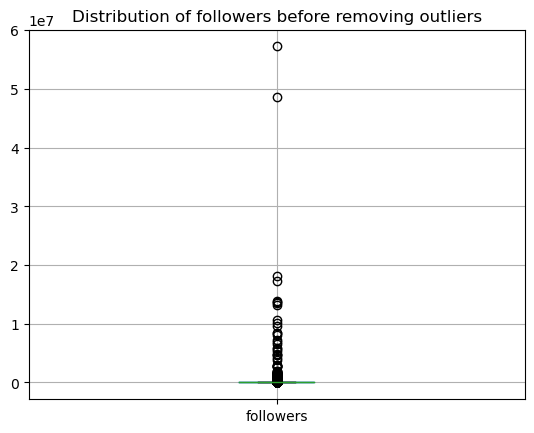

In [10]:
# Boxplot for followers before removing outliers
twitter.boxplot(column = ['followers'])
plt.title('Distribution of followers before removing outliers')
plt.savefig('cleaned_data_graphs/boxplot_followers_before_removing_outliers.png')
plt.savefig('cleaned_data_graphs/boxplot_followers_before_removing_outliers.pdf')
plt.show()

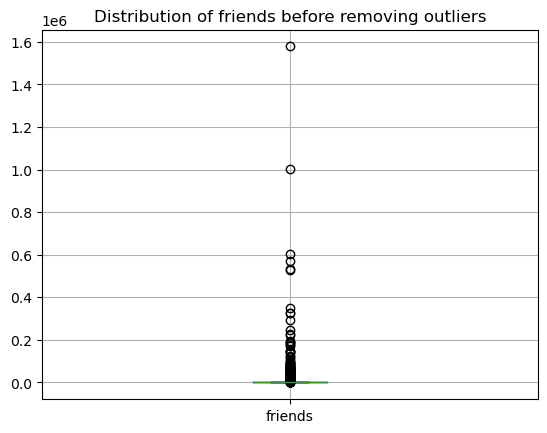

In [11]:
# Boxplot for friends before removing outliers
twitter.boxplot(column = ['friends'])
plt.title('Distribution of friends before removing outliers')
plt.savefig('cleaned_data_graphs/boxplot_friends_before_removing_outliers.png')
plt.savefig('cleaned_data_graphs/boxplot_friends_before_removing_outliers.pdf')
plt.show()

### Histogram

**The outliers are causing the graph to only show one bar**

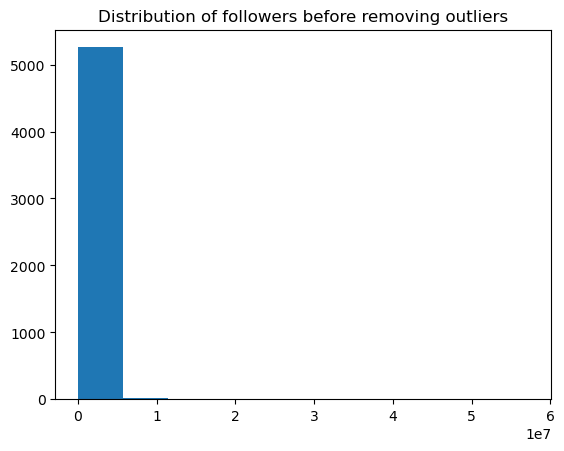

In [12]:
# Histogram for followers before removing outliers
figure, ax = plt.subplots()
ax.hist(twitter['followers'])
plt.title('Distribution of followers before removing outliers')
plt.savefig('cleaned_data_graphs/histogram_followers_before_removing_outliers.png')
plt.savefig('cleaned_data_graphs/histogram_followers_before_removing_outliers.pdf')
plt.show()

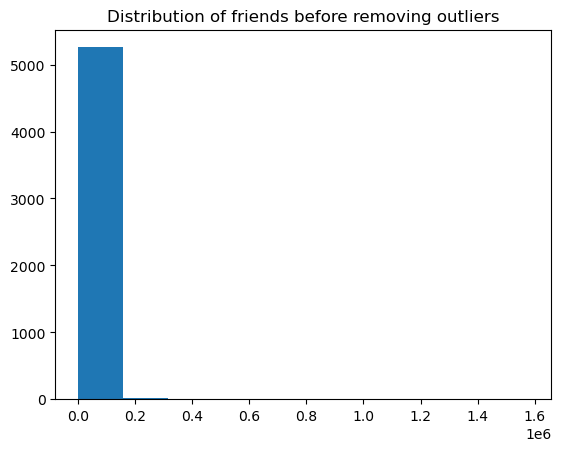

In [13]:
# Histogram for friends before removing outliers
figure, ax = plt.subplots()
ax.hist(twitter['friends'])
plt.title('Distribution of friends before removing outliers')
plt.savefig('cleaned_data_graphs/histogram_friends_before_removing_outliers.png')
plt.savefig('cleaned_data_graphs/histogram_friends_before_removing_outliers.pdf')
plt.show()

## Removing outliers

In [14]:
def outlier_IQR(df):
    '''
    This function calculates the far lower and far upper fence 
    based on 3 IQR distance from Q3 and Q1
    '''
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR = Q3 - Q1
    far_upper_fence = Q3 + 3 * IQR
    far_lower_fence = Q1 - 3 * IQR
    return far_lower_fence, far_upper_fence

### Twitter followers outliers

In [15]:
# The far upper and far lower fences are calculated for followers 
twitter_follower_lower_fence, twitter_follower_upper_fence = outlier_IQR(twitter['followers'])
twitter_follower_lower_fence, twitter_follower_upper_fence

(-13370.0, 18501.0)

In [16]:
# The data exceeding the fences is considered as outliers and is listed below
followers_outliers = twitter[(twitter.followers < twitter_follower_lower_fence) | (twitter.followers > twitter_follower_upper_fence)]
followers_outliers = pd.DataFrame(followers_outliers)
followers_outliers

,userid,utype,domain,followers,friends,total_tweets,years,per_rt,chars,chars_rt,...,org_med_vp,pot_org,rt_avg_d,rt_med,rt_avg_d_np,rt_med_np,rt_avg_d_vp,rt_med_vp,pot_rt,lexco
9,1127594474,expert,Science,23380.0,794.0,23.0,6.901370,0.000000,110.260870,0.000000,...,4.0,0.913043,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.023308357
12,4775778556,mentioned,Technology,112959.0,2100.0,3.0,6.786301,0.000000,131.333333,0.000000,...,5.0,0.955882,6.200000,5.0,2.800000,2.0,5.000000,4.0,1.000000,0.039533122
24,4422082346,mentioned,Fitness,40080.0,3805.0,1.0,6.953425,1.000000,0.000000,118.000000,...,6.0,0.986900,6.903226,7.0,3.193548,2.0,5.566667,5.0,0.967742,0.031735305
42,3464103108,between10-3msgs,Technology,24080.0,378.0,135.0,2.284932,0.962963,38.200000,107.384615,...,0.0,0.600000,4.223077,3.0,2.531250,2.0,5.320000,0.0,0.946154,0.01856801
45,4316711889,mentioned,Technology,1240196.0,850.0,476.0,6.786301,0.197479,90.740838,109.893617,...,4.0,0.846154,5.852941,5.0,3.757576,2.0,5.720000,4.0,0.882353,0.025838626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5264,3406421117,expert,Business,52440.0,40621.0,282.0,6.830137,0.031915,97.622711,114.333333,...,4.0,0.937729,6.111111,6.0,3.000000,2.0,4.777778,5.0,0.888889,0.018350488
5266,4101397160,Random,Unknown,19542.0,15553.0,6.0,8.427397,0.666667,135.000000,117.750000,...,4.0,0.784810,7.917160,7.0,4.301775,3.0,6.694805,6.0,0.988235,0.009567237
5270,6206316694,between100-10msgs,Fitness,43838.0,30988.0,404.0,7.353425,0.336634,94.138060,126.492647,...,3.0,0.985075,6.888889,7.0,3.422222,3.0,5.827869,5.0,0.977941,0.026130326
5271,4371121084,expert,Science,33273.0,3497.0,3.0,7.553425,0.333333,136.000000,124.000000,...,4.0,0.908163,7.109375,7.0,3.890625,3.0,5.947368,5.0,0.953125,0.012223501


### Twitter Friends outliers

In [17]:
# The far upper and far lower fences are calculated for friends 
twitter_friends_lower_fence, twitter_friends_upper_fence = outlier_IQR(twitter['friends'])
twitter_friends_lower_fence, twitter_friends_upper_fence

(-4774.0, 6846.0)

In [18]:
# The data exceeding the fences is considered as outliers and is listed below
friends_outliers = twitter[(twitter.friends < twitter_friends_lower_fence) | (twitter.friends > twitter_friends_upper_fence)]
friends_outliers = pd.DataFrame(friends_outliers)
friends_outliers

,userid,utype,domain,followers,friends,total_tweets,years,per_rt,chars,chars_rt,...,org_med_vp,pot_org,rt_avg_d,rt_med,rt_avg_d_np,rt_med_np,rt_avg_d_vp,rt_med_vp,pot_rt,lexco
4,6857720553,between100-10msgs,Technology,10766.0,9886.0,1.0,5.043836,1.000000,0.000000,139.000000,...,5.0,1.000000,5.720588,5.5,3.264706,2.0,5.094340,4.0,0.911765,0.009726676
8,5416149927,between10-3msgs,Fitness,14357.0,9843.0,184.0,8.164384,0.163043,107.077922,117.033333,...,4.0,0.935065,6.700000,6.0,3.666667,3.5,5.920000,4.5,1.000000,0.035342829
85,6058221832,mentioned,Fitness,18017.0,19759.0,97.0,3.676712,0.288660,116.797101,132.000000,...,4.0,0.811594,5.678571,4.5,3.518519,2.5,5.500000,3.0,0.857143,0.017931944
105,7020819230,between10-3msgs,Science,9404.0,9236.0,6.0,5.400000,0.500000,89.000000,126.666667,...,5.0,0.885593,7.867987,8.0,3.810631,3.0,6.742857,6.0,0.980198,0.015207119
107,6575589183,expert,Business,168328.0,149411.0,29.0,6.515068,0.137931,66.080000,118.250000,...,0.0,0.760000,5.500000,5.5,4.500000,3.5,5.500000,2.5,1.000000,0.164710652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5246,8611641827,between10-3msgs,Technology,29536.0,23655.0,1.0,7.342466,0.000000,119.000000,0.000000,...,4.0,0.866667,6.285714,7.0,3.642857,2.5,5.166667,4.5,0.928571,0.003708134
5258,1944653419,between100-10msgs,Technology,11163.0,10615.0,125.0,8.657534,0.536000,70.241379,126.119403,...,3.0,0.465517,6.000000,5.0,3.671642,2.0,5.036364,4.0,0.940299,0.004812645
5264,3406421117,expert,Business,52440.0,40621.0,282.0,6.830137,0.031915,97.622711,114.333333,...,4.0,0.937729,6.111111,6.0,3.000000,2.0,4.777778,5.0,0.888889,0.018350488
5266,4101397160,Random,Unknown,19542.0,15553.0,6.0,8.427397,0.666667,135.000000,117.750000,...,4.0,0.784810,7.917160,7.0,4.301775,3.0,6.694805,6.0,0.988235,0.009567237


### Combining two outliers sets

In [19]:
# Two sets of outliers are combined together
total_outliers = [followers_outliers, friends_outliers]
results = pd.concat(total_outliers)
results

,userid,utype,domain,followers,friends,total_tweets,years,per_rt,chars,chars_rt,...,org_med_vp,pot_org,rt_avg_d,rt_med,rt_avg_d_np,rt_med_np,rt_avg_d_vp,rt_med_vp,pot_rt,lexco
9,1127594474,expert,Science,23380.0,794.0,23.0,6.901370,0.000000,110.260870,0.000000,...,4.0,0.913043,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.023308357
12,4775778556,mentioned,Technology,112959.0,2100.0,3.0,6.786301,0.000000,131.333333,0.000000,...,5.0,0.955882,6.200000,5.0,2.800000,2.0,5.000000,4.0,1.000000,0.039533122
24,4422082346,mentioned,Fitness,40080.0,3805.0,1.0,6.953425,1.000000,0.000000,118.000000,...,6.0,0.986900,6.903226,7.0,3.193548,2.0,5.566667,5.0,0.967742,0.031735305
42,3464103108,between10-3msgs,Technology,24080.0,378.0,135.0,2.284932,0.962963,38.200000,107.384615,...,0.0,0.600000,4.223077,3.0,2.531250,2.0,5.320000,0.0,0.946154,0.01856801
45,4316711889,mentioned,Technology,1240196.0,850.0,476.0,6.786301,0.197479,90.740838,109.893617,...,4.0,0.846154,5.852941,5.0,3.757576,2.0,5.720000,4.0,0.882353,0.025838626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5246,8611641827,between10-3msgs,Technology,29536.0,23655.0,1.0,7.342466,0.000000,119.000000,0.000000,...,4.0,0.866667,6.285714,7.0,3.642857,2.5,5.166667,4.5,0.928571,0.003708134
5258,1944653419,between100-10msgs,Technology,11163.0,10615.0,125.0,8.657534,0.536000,70.241379,126.119403,...,3.0,0.465517,6.000000,5.0,3.671642,2.0,5.036364,4.0,0.940299,0.004812645
5264,3406421117,expert,Business,52440.0,40621.0,282.0,6.830137,0.031915,97.622711,114.333333,...,4.0,0.937729,6.111111,6.0,3.000000,2.0,4.777778,5.0,0.888889,0.018350488
5266,4101397160,Random,Unknown,19542.0,15553.0,6.0,8.427397,0.666667,135.000000,117.750000,...,4.0,0.784810,7.917160,7.0,4.301775,3.0,6.694805,6.0,0.988235,0.009567237


### Dropping outliers

In [20]:
# The outliers are removed from original dataset
twitter_no_outliers = twitter.drop(results.index)
twitter_no_outliers

,userid,utype,domain,followers,friends,total_tweets,years,per_rt,chars,chars_rt,...,org_med_vp,pot_org,rt_avg_d,rt_med,rt_avg_d_np,rt_med_np,rt_avg_d_vp,rt_med_vp,pot_rt,lexco
0,5480470996,between100-10msgs,Technology,1796.0,165.0,45.0,3.043836,0.844444,77.285714,124.052632,...,0.0,0.857143,4.324324,3.0,2.729730,2.0,4.722222,0.0,0.789474,0.012117083
1,7280696314,morethan100msgs,Fitness,1699.0,1023.0,352.0,2.126027,1.000000,0.000000,132.244318,...,0.0,0.000000,5.436090,5.0,3.171875,2.0,4.755102,3.0,0.876812,0.007826719
2,1570594151,morethan100msgs,Technology,6382.0,6244.0,5.0,5.227397,0.000000,61.200000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0
3,9433661207,Random,Unknown,622.0,823.0,7.0,5.926027,1.000000,0.000000,139.857143,...,0.0,0.000000,6.142857,5.0,3.285714,3.0,5.500000,4.0,1.000000,0
5,8605225924,between10-3msgs,Technology,238.0,233.0,19.0,6.800000,0.157895,119.250000,140.000000,...,8.0,0.937500,7.666667,8.0,4.000000,3.0,5.333333,6.0,1.000000,0.011448461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5276,8902000102,mentioned,Science,6517.0,530.0,18.0,6.482192,0.833333,108.666667,132.533333,...,5.0,1.000000,5.200000,5.0,3.200000,3.0,5.000000,3.0,1.000000,0.084566365
5277,4249953361,morethan100msgs,Fitness,283.0,65.0,2342.0,1.846575,0.014518,114.548094,122.882353,...,0.0,0.507799,2.964286,3.0,2.107143,2.0,2.533333,2.0,0.588235,0.002352646
5278,6875118252,friend,Fitness,1560.0,1996.0,1.0,7.704110,0.000000,51.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0
5279,6100001786,mentioned,Science,364.0,396.0,24.0,5.364384,0.208333,101.789474,132.400000,...,4.0,0.894737,10.000000,9.0,4.800000,2.0,8.400000,8.0,1.000000,0.00528974


In [21]:
twitter_cleaned = twitter_no_outliers

## After removing outliers

### Boxplot

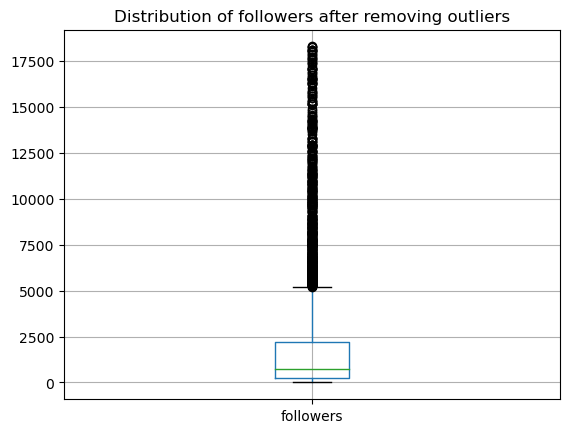

In [22]:
# Boxplot for followers after removing outliers
twitter_cleaned.boxplot(column = ['followers'])
plt.title('Distribution of followers after removing outliers')
plt.savefig('cleaned_data_graphs/boxplot_followers_after_removing_outliers.png')
plt.savefig('cleaned_data_graphs/boxplot_followers_after_removing_outliers.pdf')
plt.show()

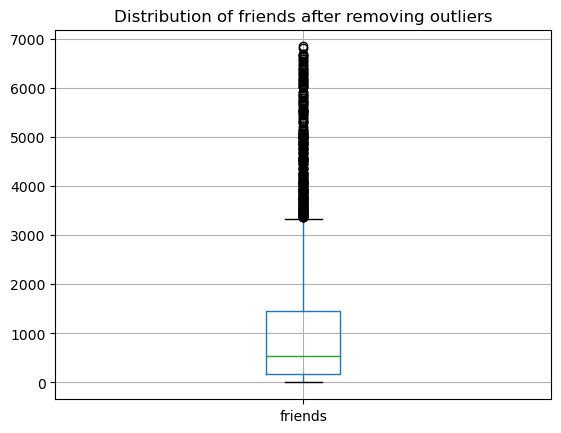

In [23]:
# Boxplot for friends after removing outliers
twitter_cleaned.boxplot(column = ['friends'])
plt.title('Distribution of friends after removing outliers')
plt.savefig('cleaned_data_graphs/boxplot_friends_after_removing_outliers.png')
plt.savefig('cleaned_data_graphs/boxplot_friends_after_removing_outliers.pdf')
plt.show()

### Histogram

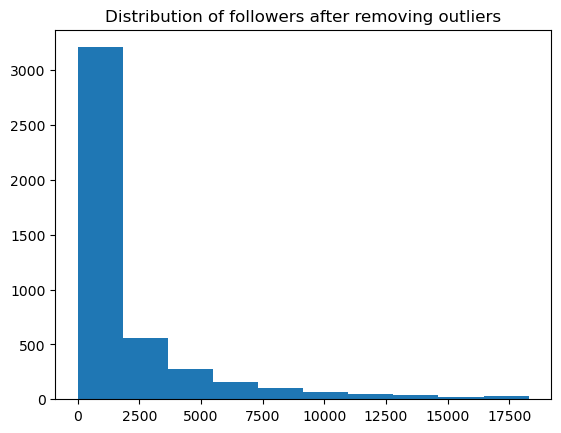

In [24]:
# Histogram for followers after removing outliers
figure, ax = plt.subplots()
ax.hist(twitter_cleaned['followers'])
plt.title('Distribution of followers after removing outliers')
plt.savefig('cleaned_data_graphs/histogram_followers_after_removing_outliers.png')
plt.savefig('cleaned_data_graphs/histogram_followers_after_removing_outliers.pdf')
plt.show()

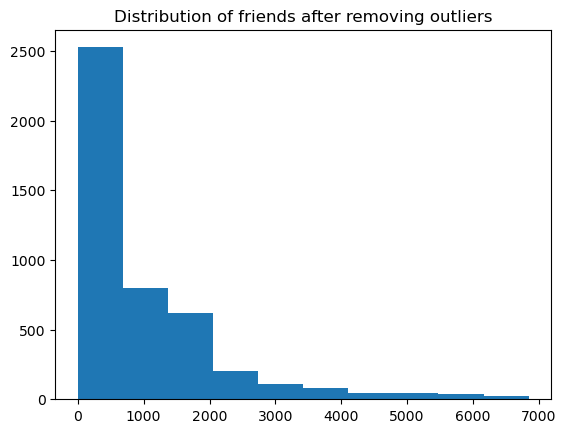

In [25]:
# Histogram for friends after removing outliers
figure, ax = plt.subplots()
ax.hist(twitter_cleaned['friends'])
plt.title('Distribution of friends after removing outliers')
plt.savefig('cleaned_data_graphs/histogram_friends_after_removing_outliers.png')
plt.savefig('cleaned_data_graphs/histogram_friends_after_removing_outliers.pdf')
plt.show()

In [26]:
# Data after removing outliers and cleaned
twitter_cleaned

,userid,utype,domain,followers,friends,total_tweets,years,per_rt,chars,chars_rt,...,org_med_vp,pot_org,rt_avg_d,rt_med,rt_avg_d_np,rt_med_np,rt_avg_d_vp,rt_med_vp,pot_rt,lexco
0,5480470996,between100-10msgs,Technology,1796.0,165.0,45.0,3.043836,0.844444,77.285714,124.052632,...,0.0,0.857143,4.324324,3.0,2.729730,2.0,4.722222,0.0,0.789474,0.012117083
1,7280696314,morethan100msgs,Fitness,1699.0,1023.0,352.0,2.126027,1.000000,0.000000,132.244318,...,0.0,0.000000,5.436090,5.0,3.171875,2.0,4.755102,3.0,0.876812,0.007826719
2,1570594151,morethan100msgs,Technology,6382.0,6244.0,5.0,5.227397,0.000000,61.200000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0
3,9433661207,Random,Unknown,622.0,823.0,7.0,5.926027,1.000000,0.000000,139.857143,...,0.0,0.000000,6.142857,5.0,3.285714,3.0,5.500000,4.0,1.000000,0
5,8605225924,between10-3msgs,Technology,238.0,233.0,19.0,6.800000,0.157895,119.250000,140.000000,...,8.0,0.937500,7.666667,8.0,4.000000,3.0,5.333333,6.0,1.000000,0.011448461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5276,8902000102,mentioned,Science,6517.0,530.0,18.0,6.482192,0.833333,108.666667,132.533333,...,5.0,1.000000,5.200000,5.0,3.200000,3.0,5.000000,3.0,1.000000,0.084566365
5277,4249953361,morethan100msgs,Fitness,283.0,65.0,2342.0,1.846575,0.014518,114.548094,122.882353,...,0.0,0.507799,2.964286,3.0,2.107143,2.0,2.533333,2.0,0.588235,0.002352646
5278,6875118252,friend,Fitness,1560.0,1996.0,1.0,7.704110,0.000000,51.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0
5279,6100001786,mentioned,Science,364.0,396.0,24.0,5.364384,0.208333,101.789474,132.400000,...,4.0,0.894737,10.000000,9.0,4.800000,2.0,8.400000,8.0,1.000000,0.00528974


# Log Transformation

Log transformations of [followers, friends, total tweets]

Base 2


In [27]:
#twitter_cleaned['followers'] = np.log2(twitter_cleaned['followers'])
#twitter_cleaned['friends'] = np.log2(twitter_cleaned['friends'])
#twitter_cleaned['total_tweets'] = np.log2(twitter_cleaned['total_tweets'])
twitter_cleaned

,userid,utype,domain,followers,friends,total_tweets,years,per_rt,chars,chars_rt,...,org_med_vp,pot_org,rt_avg_d,rt_med,rt_avg_d_np,rt_med_np,rt_avg_d_vp,rt_med_vp,pot_rt,lexco
0,5480470996,between100-10msgs,Technology,1796.0,165.0,45.0,3.043836,0.844444,77.285714,124.052632,...,0.0,0.857143,4.324324,3.0,2.729730,2.0,4.722222,0.0,0.789474,0.012117083
1,7280696314,morethan100msgs,Fitness,1699.0,1023.0,352.0,2.126027,1.000000,0.000000,132.244318,...,0.0,0.000000,5.436090,5.0,3.171875,2.0,4.755102,3.0,0.876812,0.007826719
2,1570594151,morethan100msgs,Technology,6382.0,6244.0,5.0,5.227397,0.000000,61.200000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0
3,9433661207,Random,Unknown,622.0,823.0,7.0,5.926027,1.000000,0.000000,139.857143,...,0.0,0.000000,6.142857,5.0,3.285714,3.0,5.500000,4.0,1.000000,0
5,8605225924,between10-3msgs,Technology,238.0,233.0,19.0,6.800000,0.157895,119.250000,140.000000,...,8.0,0.937500,7.666667,8.0,4.000000,3.0,5.333333,6.0,1.000000,0.011448461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5276,8902000102,mentioned,Science,6517.0,530.0,18.0,6.482192,0.833333,108.666667,132.533333,...,5.0,1.000000,5.200000,5.0,3.200000,3.0,5.000000,3.0,1.000000,0.084566365
5277,4249953361,morethan100msgs,Fitness,283.0,65.0,2342.0,1.846575,0.014518,114.548094,122.882353,...,0.0,0.507799,2.964286,3.0,2.107143,2.0,2.533333,2.0,0.588235,0.002352646
5278,6875118252,friend,Fitness,1560.0,1996.0,1.0,7.704110,0.000000,51.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0
5279,6100001786,mentioned,Science,364.0,396.0,24.0,5.364384,0.208333,101.789474,132.400000,...,4.0,0.894737,10.000000,9.0,4.800000,2.0,8.400000,8.0,1.000000,0.00528974


# Type Conversion

In [28]:
for column in twitter_cleaned.iloc[:,3:]:
    twitter_cleaned[column]= twitter_cleaned[column].astype('float64')

In [29]:
with pd.option_context('display.max_rows', None):
    print(twitter_cleaned.dtypes)

userid                      int64
utype                      object
domain                     object
followers                 float64
friends                   float64
total_tweets              float64
years                     float64
per_rt                    float64
chars                     float64
chars_rt                  float64
commas                    float64
commas_rt                 float64
periods                   float64
periods_rt                float64
quesmark                  float64
quesmark_rt               float64
exmark                    float64
exmark_rt                 float64
colon                     float64
colon_rt                  float64
semi                      float64
semi_rt                   float64
punc                      float64
punc_rt                   float64
tagpermsg                 float64
tagpermsg_rt              float64
mentpermsg                float64
mentpermsg_rt             float64
urlpermsg                 float64
urlpermsg_rt  

# Combine original tweets and re-tweets

In [30]:
twitter_cleaned

,userid,utype,domain,followers,friends,total_tweets,years,per_rt,chars,chars_rt,...,org_med_vp,pot_org,rt_avg_d,rt_med,rt_avg_d_np,rt_med_np,rt_avg_d_vp,rt_med_vp,pot_rt,lexco
0,5480470996,between100-10msgs,Technology,1796.0,165.0,45.0,3.043836,0.844444,77.285714,124.052632,...,0.0,0.857143,4.324324,3.0,2.729730,2.0,4.722222,0.0,0.789474,0.012117
1,7280696314,morethan100msgs,Fitness,1699.0,1023.0,352.0,2.126027,1.000000,0.000000,132.244318,...,0.0,0.000000,5.436090,5.0,3.171875,2.0,4.755102,3.0,0.876812,0.007827
2,1570594151,morethan100msgs,Technology,6382.0,6244.0,5.0,5.227397,0.000000,61.200000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000
3,9433661207,Random,Unknown,622.0,823.0,7.0,5.926027,1.000000,0.000000,139.857143,...,0.0,0.000000,6.142857,5.0,3.285714,3.0,5.500000,4.0,1.000000,0.000000
5,8605225924,between10-3msgs,Technology,238.0,233.0,19.0,6.800000,0.157895,119.250000,140.000000,...,8.0,0.937500,7.666667,8.0,4.000000,3.0,5.333333,6.0,1.000000,0.011448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5276,8902000102,mentioned,Science,6517.0,530.0,18.0,6.482192,0.833333,108.666667,132.533333,...,5.0,1.000000,5.200000,5.0,3.200000,3.0,5.000000,3.0,1.000000,0.084566
5277,4249953361,morethan100msgs,Fitness,283.0,65.0,2342.0,1.846575,0.014518,114.548094,122.882353,...,0.0,0.507799,2.964286,3.0,2.107143,2.0,2.533333,2.0,0.588235,0.002353
5278,6875118252,friend,Fitness,1560.0,1996.0,1.0,7.704110,0.000000,51.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000
5279,6100001786,mentioned,Science,364.0,396.0,24.0,5.364384,0.208333,101.789474,132.400000,...,4.0,0.894737,10.000000,9.0,4.800000,2.0,8.400000,8.0,1.000000,0.005290


In [31]:
# Combing original tweets and re-tweets for all requried features
# Conditions:
        # if original feature = 0, then combined feature = re-tweet features
        # if re-tweet feature = 0, then combined feature = original tweet feature
        # else: Combine original tweet feature with re-tweet features using average. 
                # i.e. combined feature = (original + retweet) / 2

twitter_cleaned.loc[twitter_cleaned['chars']==0, 'chars_combined'] = twitter_cleaned['chars_rt']
twitter_cleaned.loc[twitter_cleaned['chars_rt']==0, 'chars_combined'] = twitter_cleaned['chars']
twitter_cleaned.loc[twitter_cleaned['chars_combined'].isna(), 'chars_combined'] = (twitter_cleaned['chars'] + twitter_cleaned['chars_rt'])/2

twitter_cleaned.loc[twitter_cleaned['quesmark']==0, 'quesmark_combined'] = twitter_cleaned['quesmark_rt']
twitter_cleaned.loc[twitter_cleaned['quesmark_rt']==0, 'quesmark_combined'] = twitter_cleaned['quesmark']
twitter_cleaned.loc[twitter_cleaned['quesmark_combined'].isna(), 'quesmark_combined'] = (twitter_cleaned['quesmark'] + twitter_cleaned['quesmark_rt'])/2

twitter_cleaned.loc[twitter_cleaned['exmark']==0, 'exmark_combined'] = twitter_cleaned['exmark_rt']
twitter_cleaned.loc[twitter_cleaned['exmark_rt']==0, 'exmark_combined'] = twitter_cleaned['exmark']
twitter_cleaned.loc[twitter_cleaned['exmark_combined'].isna(), 'exmark_combined'] = (twitter_cleaned['exmark'] + twitter_cleaned['exmark_rt'])/2

twitter_cleaned.loc[twitter_cleaned['semi']==0, 'semi_combined'] = twitter_cleaned['semi_rt']
twitter_cleaned.loc[twitter_cleaned['semi_rt']==0, 'semi_combined'] = twitter_cleaned['semi']
twitter_cleaned.loc[twitter_cleaned['semi_combined'].isna(), 'semi_combined'] = (twitter_cleaned['semi'] + twitter_cleaned['semi_rt'])/2

twitter_cleaned.loc[twitter_cleaned['punc']==0, 'punc_combined'] = twitter_cleaned['punc_rt']
twitter_cleaned.loc[twitter_cleaned['punc_rt']==0, 'punc_combined'] = twitter_cleaned['punc']
twitter_cleaned.loc[twitter_cleaned['punc_combined'].isna(), 'punc_combined'] = (twitter_cleaned['punc'] + twitter_cleaned['punc_rt'])/2

twitter_cleaned.loc[twitter_cleaned['tagpermsg']==0, 'tagpermsg_combined'] = twitter_cleaned['tagpermsg_rt']
twitter_cleaned.loc[twitter_cleaned['tagpermsg_rt']==0, 'tagpermsg_combined'] = twitter_cleaned['tagpermsg']
twitter_cleaned.loc[twitter_cleaned['tagpermsg_combined'].isna(), 'tagpermsg_combined'] = (twitter_cleaned['tagpermsg'] + twitter_cleaned['tagpermsg_rt'])/2

twitter_cleaned.loc[twitter_cleaned['mentpermsg']==0, 'mentpermsg_combined'] = twitter_cleaned['mentpermsg_rt']
twitter_cleaned.loc[twitter_cleaned['mentpermsg_rt']==0, 'mentpermsg_combined'] = twitter_cleaned['mentpermsg']
twitter_cleaned.loc[twitter_cleaned['mentpermsg_combined'].isna(), 'mentpermsg_combined'] = (twitter_cleaned['mentpermsg'] + twitter_cleaned['mentpermsg_rt'])/2

twitter_cleaned.loc[twitter_cleaned['percent_msgwithment']==0, 'percent_msgwithment_combined'] = twitter_cleaned['percent_msgwithment_rt']
twitter_cleaned.loc[twitter_cleaned['percent_msgwithment_rt']==0, 'percent_msgwithment_combined'] = twitter_cleaned['percent_msgwithment']
twitter_cleaned.loc[twitter_cleaned['percent_msgwithment_combined'].isna(), 'percent_msgwithment_combined'] = (twitter_cleaned['percent_msgwithment'] + twitter_cleaned['percent_msgwithment_rt'])/2

twitter_cleaned.loc[twitter_cleaned['percent_msgwithtag']==0, 'percent_msgwithtag_combined'] = twitter_cleaned['percent_msgwithtag_rt']
twitter_cleaned.loc[twitter_cleaned['percent_msgwithtag_rt']==0, 'percent_msgwithtag_combined'] = twitter_cleaned['percent_msgwithtag']
twitter_cleaned.loc[twitter_cleaned['percent_msgwithtag_combined'].isna(), 'percent_msgwithtag_combined'] = (twitter_cleaned['percent_msgwithtag'] + twitter_cleaned['percent_msgwithtag_rt'])/2

twitter_cleaned.loc[twitter_cleaned['percent_msgwithurl']==0, 'percent_msgwithurl_combined'] = twitter_cleaned['percent_msgwithurl_rt']
twitter_cleaned.loc[twitter_cleaned['percent_msgwithurl_rt']==0, 'percent_msgwithurl_combined'] = twitter_cleaned['percent_msgwithurl']
twitter_cleaned.loc[twitter_cleaned['percent_msgwithurl_combined'].isna(), 'percent_msgwithurl_combined'] = (twitter_cleaned['percent_msgwithurl'] + twitter_cleaned['percent_msgwithurl_rt'])/2

twitter_cleaned.loc[twitter_cleaned['org_med']==0, 'org_med_combined'] = twitter_cleaned['rt_med']
twitter_cleaned.loc[twitter_cleaned['rt_med']==0, 'org_med_combined'] = twitter_cleaned['org_med']
twitter_cleaned.loc[twitter_cleaned['org_med_combined'].isna(), 'org_med_combined'] = (twitter_cleaned['org_med'] + twitter_cleaned['rt_med'])/2

twitter_cleaned.loc[twitter_cleaned['org_med_np']==0, 'org_med_np_combined'] = twitter_cleaned['rt_med_np']
twitter_cleaned.loc[twitter_cleaned['rt_med_np']==0, 'org_med_np_combined'] = twitter_cleaned['org_med_np']
twitter_cleaned.loc[twitter_cleaned['org_med_np_combined'].isna(), 'org_med_np_combined'] = (twitter_cleaned['org_med_np'] + twitter_cleaned['rt_med_np'])/2

twitter_cleaned.loc[twitter_cleaned['org_med_vp']==0, 'org_med_vp_combined'] = twitter_cleaned['rt_med_vp']
twitter_cleaned.loc[twitter_cleaned['rt_med_vp']==0, 'org_med_vp_combined'] = twitter_cleaned['org_med_vp']
twitter_cleaned.loc[twitter_cleaned['org_med_vp_combined'].isna(), 'org_med_vp_combined'] = (twitter_cleaned['org_med_vp'] + twitter_cleaned['rt_med_vp'])/2


twitter_cleaned

,userid,utype,domain,followers,friends,total_tweets,years,per_rt,chars,chars_rt,...,semi_combined,punc_combined,tagpermsg_combined,mentpermsg_combined,percent_msgwithment_combined,percent_msgwithtag_combined,percent_msgwithurl_combined,org_med_combined,org_med_np_combined,org_med_vp_combined
0,5480470996,between100-10msgs,Technology,1796.0,165.0,45.0,3.043836,0.844444,77.285714,124.052632,...,0.105263,4.026316,1.657895,1.210526,0.785714,0.710526,0.687970,3.0,2.0,0.0
1,7280696314,morethan100msgs,Fitness,1699.0,1023.0,352.0,2.126027,1.000000,0.000000,132.244318,...,0.090909,4.784091,3.363636,1.284091,1.000000,1.000000,1.000000,5.0,2.0,3.0
2,1570594151,morethan100msgs,Technology,6382.0,6244.0,5.0,5.227397,0.000000,61.200000,0.000000,...,0.000000,2.000000,1.000000,0.000000,0.000000,0.600000,1.000000,2.0,2.0,0.0
3,9433661207,Random,Unknown,622.0,823.0,7.0,5.926027,1.000000,0.000000,139.857143,...,0.000000,4.571429,1.285714,1.714286,1.000000,0.857143,0.857143,5.0,3.0,4.0
5,8605225924,between10-3msgs,Technology,238.0,233.0,19.0,6.800000,0.157895,119.250000,140.000000,...,0.000000,2.500000,0.687500,1.072917,0.750000,0.437500,0.416667,8.5,2.5,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5276,8902000102,mentioned,Science,6517.0,530.0,18.0,6.482192,0.833333,108.666667,132.533333,...,0.266667,3.733333,1.066667,2.233333,1.000000,0.666667,1.000000,6.0,3.5,4.0
5277,4249953361,morethan100msgs,Fitness,283.0,65.0,2342.0,1.846575,0.014518,114.548094,122.882353,...,0.046310,5.100647,3.846098,0.108217,0.093052,0.622591,0.003899,2.5,2.0,2.0
5278,6875118252,friend,Fitness,1560.0,1996.0,1.0,7.704110,0.000000,51.000000,0.000000,...,0.000000,2.000000,2.000000,0.000000,0.000000,1.000000,1.000000,2.0,2.0,0.0
5279,6100001786,mentioned,Science,364.0,396.0,24.0,5.364384,0.208333,101.789474,132.400000,...,0.284211,4.110526,0.000000,1.147368,0.815789,0.000000,0.636842,7.5,2.0,6.0


# Subjectivity Index

In [32]:
# Construct Subjectivity Index
twitter_cleaned['sub_index'] = (twitter_cleaned['exmark_combined'] + 
                                twitter_cleaned['first'] + 
                                twitter_cleaned['interj'] + 
                                twitter_cleaned['slang'] + 
                             twitter_cleaned['sentiment'] + 
                                twitter_cleaned['active_vb'] -
                                 twitter_cleaned['semi_combined'])
twitter_cleaned

,userid,utype,domain,followers,friends,total_tweets,years,per_rt,chars,chars_rt,...,punc_combined,tagpermsg_combined,mentpermsg_combined,percent_msgwithment_combined,percent_msgwithtag_combined,percent_msgwithurl_combined,org_med_combined,org_med_np_combined,org_med_vp_combined,sub_index
0,5480470996,between100-10msgs,Technology,1796.0,165.0,45.0,3.043836,0.844444,77.285714,124.052632,...,4.026316,1.657895,1.210526,0.785714,0.710526,0.687970,3.0,2.0,0.0,1.503432
1,7280696314,morethan100msgs,Fitness,1699.0,1023.0,352.0,2.126027,1.000000,0.000000,132.244318,...,4.784091,3.363636,1.284091,1.000000,1.000000,1.000000,5.0,2.0,3.0,3.266043
2,1570594151,morethan100msgs,Technology,6382.0,6244.0,5.0,5.227397,0.000000,61.200000,0.000000,...,2.000000,1.000000,0.000000,0.000000,0.600000,1.000000,2.0,2.0,0.0,0.000000
3,9433661207,Random,Unknown,622.0,823.0,7.0,5.926027,1.000000,0.000000,139.857143,...,4.571429,1.285714,1.714286,1.000000,0.857143,0.857143,5.0,3.0,4.0,2.892857
5,8605225924,between10-3msgs,Technology,238.0,233.0,19.0,6.800000,0.157895,119.250000,140.000000,...,2.500000,0.687500,1.072917,0.750000,0.437500,0.416667,8.5,2.5,7.0,2.595833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5276,8902000102,mentioned,Science,6517.0,530.0,18.0,6.482192,0.833333,108.666667,132.533333,...,3.733333,1.066667,2.233333,1.000000,0.666667,1.000000,6.0,3.5,4.0,1.991667
5277,4249953361,morethan100msgs,Fitness,283.0,65.0,2342.0,1.846575,0.014518,114.548094,122.882353,...,5.100647,3.846098,0.108217,0.093052,0.622591,0.003899,2.5,2.0,2.0,3.482211
5278,6875118252,friend,Fitness,1560.0,1996.0,1.0,7.704110,0.000000,51.000000,0.000000,...,2.000000,2.000000,0.000000,0.000000,1.000000,1.000000,2.0,2.0,0.0,0.000000
5279,6100001786,mentioned,Science,364.0,396.0,24.0,5.364384,0.208333,101.789474,132.400000,...,4.110526,0.000000,1.147368,0.815789,0.000000,0.636842,7.5,2.0,6.0,4.485965


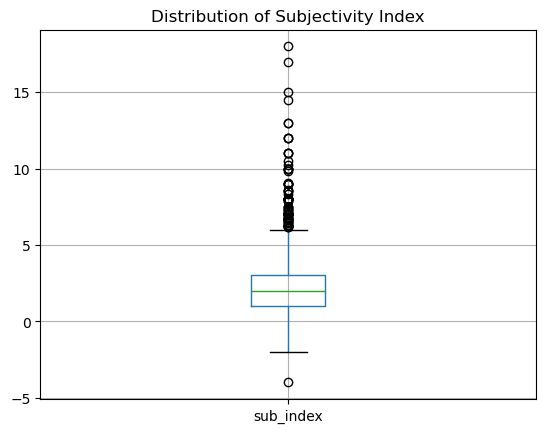

In [33]:
# Boxplot for Subjectivity Index after removing outliers
twitter_cleaned.boxplot(column = ['sub_index'])
plt.title('Distribution of Subjectivity Index')
plt.savefig('cleaned_data_graphs/boxplot_subjectivity_index.png')
plt.savefig('cleaned_data_graphs/boxplot_subjectivity_index.pdf')
plt.show()

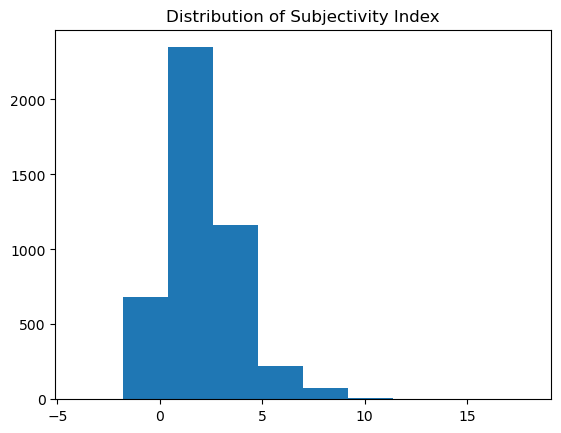

In [34]:
# Histogram for Subjectivity Index after removing outliers
figure, ax = plt.subplots()
ax.hist(twitter_cleaned['sub_index'])
plt.title('Distribution of Subjectivity Index')
plt.savefig('cleaned_data_graphs/histogram_subjectivity_index.png')
plt.savefig('cleaned_data_graphs/histogram_subjectivity_index.pdf')
plt.show()

/usr/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


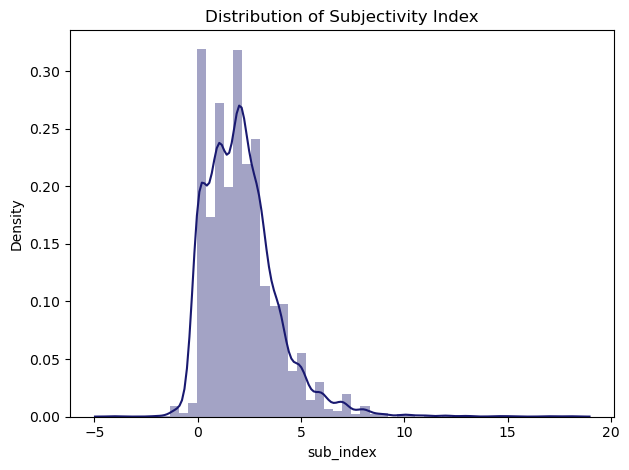

In [35]:
sns.distplot(twitter_cleaned['sub_index'], color = "midnightblue", label = "sub_index")
plt.xlabel("sub_index")
plt.ylabel("Density")
plt.title("Distribution of Subjectivity Index")
plt.tight_layout()

plt.savefig('cleaned_data_graphs/densitygraph_subjectivity_index.png')
plt.savefig('cleaned_data_graphs/densitygraph_subjectivity_index.pdf')
plt.show()

## Subjective Language

If the Subjectivity Index of a twitter account is greater than the median, the twitter account is considered to be using more subjective language

In [36]:
# Calculating the median of Subjectivity Index
sub_index_median = twitter_cleaned['sub_index'].median()
sub_index_median

twitter_cleaned.loc[twitter_cleaned['sub_index'] > 2.0 , 'sub_lang'] = 1
twitter_cleaned.loc[twitter_cleaned['sub_index'] <= 2.0 , 'sub_lang'] = 0

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(twitter_cleaned['sub_lang'])

0       0.0
1       1.0
2       0.0
3       1.0
5       1.0
6       1.0
7       1.0
10      0.0
11      0.0
13      1.0
14      1.0
15      0.0
16      0.0
17      1.0
18      0.0
19      1.0
20      1.0
21      0.0
22      0.0
23      0.0
25      1.0
26      0.0
27      0.0
28      0.0
29      1.0
30      0.0
31      0.0
32      0.0
33      1.0
34      0.0
35      1.0
36      1.0
37      0.0
38      0.0
39      1.0
40      0.0
41      0.0
43      0.0
44      0.0
46      0.0
47      1.0
48      0.0
49      0.0
50      0.0
51      0.0
52      0.0
53      0.0
54      1.0
55      0.0
56      0.0
57      1.0
58      1.0
59      0.0
61      1.0
62      0.0
63      1.0
64      1.0
65      1.0
66      0.0
67      0.0
68      0.0
69      1.0
70      1.0
71      0.0
72      1.0
73      1.0
74      0.0
75      0.0
76      0.0
78      0.0
79      1.0
80      0.0
81      1.0
82      0.0
84      1.0
86      0.0
87      1.0
88      0.0
90      0.0
91      0.0
92      0.0
93      1.0
94      1.0
95  

In [37]:
twitter_cleaned

,userid,utype,domain,followers,friends,total_tweets,years,per_rt,chars,chars_rt,...,tagpermsg_combined,mentpermsg_combined,percent_msgwithment_combined,percent_msgwithtag_combined,percent_msgwithurl_combined,org_med_combined,org_med_np_combined,org_med_vp_combined,sub_index,sub_lang
0,5480470996,between100-10msgs,Technology,1796.0,165.0,45.0,3.043836,0.844444,77.285714,124.052632,...,1.657895,1.210526,0.785714,0.710526,0.687970,3.0,2.0,0.0,1.503432,0.0
1,7280696314,morethan100msgs,Fitness,1699.0,1023.0,352.0,2.126027,1.000000,0.000000,132.244318,...,3.363636,1.284091,1.000000,1.000000,1.000000,5.0,2.0,3.0,3.266043,1.0
2,1570594151,morethan100msgs,Technology,6382.0,6244.0,5.0,5.227397,0.000000,61.200000,0.000000,...,1.000000,0.000000,0.000000,0.600000,1.000000,2.0,2.0,0.0,0.000000,0.0
3,9433661207,Random,Unknown,622.0,823.0,7.0,5.926027,1.000000,0.000000,139.857143,...,1.285714,1.714286,1.000000,0.857143,0.857143,5.0,3.0,4.0,2.892857,1.0
5,8605225924,between10-3msgs,Technology,238.0,233.0,19.0,6.800000,0.157895,119.250000,140.000000,...,0.687500,1.072917,0.750000,0.437500,0.416667,8.5,2.5,7.0,2.595833,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5276,8902000102,mentioned,Science,6517.0,530.0,18.0,6.482192,0.833333,108.666667,132.533333,...,1.066667,2.233333,1.000000,0.666667,1.000000,6.0,3.5,4.0,1.991667,0.0
5277,4249953361,morethan100msgs,Fitness,283.0,65.0,2342.0,1.846575,0.014518,114.548094,122.882353,...,3.846098,0.108217,0.093052,0.622591,0.003899,2.5,2.0,2.0,3.482211,1.0
5278,6875118252,friend,Fitness,1560.0,1996.0,1.0,7.704110,0.000000,51.000000,0.000000,...,2.000000,0.000000,0.000000,1.000000,1.000000,2.0,2.0,0.0,0.000000,0.0
5279,6100001786,mentioned,Science,364.0,396.0,24.0,5.364384,0.208333,101.789474,132.400000,...,0.000000,1.147368,0.815789,0.000000,0.636842,7.5,2.0,6.0,4.485965,1.0


# Feature Selection

In [38]:
# (For Linear Regression) Select Relevent features for further supervised learning
# twitter_selected1 = twitter_cleaned[['sub_index', 'sub_lang', 'expert','Technology', 'Science', 'Unknown', 'Fitness','Business', 'followers','friends','total_tweets','years','chars_combined','quesmark_combined','punc_combined','tagpermsg_combined','mentpermsg_combined','percent_msgwithment_combined','percent_msgwithtag_combined','percent_msgwithurl_combined','org_med_combined','org_med_np_combined','org_med_vp_combined', 'exmark_combined', 'first', 'interj','slang', 'sentiment', 'active_vb','semi_combined']]
# twitter_selected1

In [39]:
twitter_selected = twitter_cleaned[['sub_index', 'utype', 'domain',
#'Technology', 'Science', 'Unknown', 'Fitness','Business', 
'followers','friends','total_tweets','years','chars_combined','quesmark_combined','punc_combined','tagpermsg_combined','mentpermsg_combined','percent_msgwithment_combined','percent_msgwithtag_combined','percent_msgwithurl_combined','org_med_combined','org_med_np_combined','org_med_vp_combined', 'exmark_combined', 'first', 'interj','slang', 'sentiment', 'active_vb','semi_combined']]
twitter_selected

,sub_index,utype,domain,followers,friends,total_tweets,years,chars_combined,quesmark_combined,punc_combined,...,org_med_combined,org_med_np_combined,org_med_vp_combined,exmark_combined,first,interj,slang,sentiment,active_vb,semi_combined
0,1.503432,between100-10msgs,Technology,1796.0,165.0,45.0,3.043836,100.669173,0.131579,4.026316,...,3.0,2.0,0.0,0.000000,0.086957,1.000000,0.260870,0.043478,0.217391,0.105263
1,3.266043,morethan100msgs,Fitness,1699.0,1023.0,352.0,2.126027,132.244318,0.073864,4.784091,...,5.0,2.0,3.0,0.386364,0.629412,0.400000,1.311765,0.282353,0.347059,0.090909
2,0.000000,morethan100msgs,Technology,6382.0,6244.0,5.0,5.227397,61.200000,0.000000,2.000000,...,2.0,2.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,2.892857,Random,Unknown,622.0,823.0,7.0,5.926027,139.857143,0.142857,4.571429,...,5.0,3.0,4.0,0.142857,0.750000,0.250000,1.250000,0.500000,0.000000,0.000000
5,2.595833,between10-3msgs,Technology,238.0,233.0,19.0,6.800000,129.625000,0.062500,2.500000,...,8.5,2.5,7.0,0.062500,0.133333,0.133333,0.533333,1.000000,0.733333,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5276,1.991667,mentioned,Science,6517.0,530.0,18.0,6.482192,120.600000,0.066667,3.733333,...,6.0,3.5,4.0,0.133333,0.500000,0.500000,0.750000,0.125000,0.250000,0.266667
5277,3.482211,morethan100msgs,Fitness,283.0,65.0,2342.0,1.846575,118.715223,0.066431,5.100647,...,2.5,2.0,2.0,0.395657,0.483189,1.878525,0.674620,0.039588,0.056941,0.046310
5278,0.000000,friend,Fitness,1560.0,1996.0,1.0,7.704110,51.000000,0.000000,2.000000,...,2.0,2.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5279,4.485965,mentioned,Science,364.0,396.0,24.0,5.364384,117.094737,0.436842,4.110526,...,7.5,2.0,6.0,0.436842,0.444444,1.666667,1.777778,0.166667,0.277778,0.284211


In [80]:
all_fea_lis = pd.read_csv("feature_lis.csv")
var_dict = {}
var_name = []
index = 0

pattern = r'\w+_combined'

for name in twitter_selected.columns:
    name = re.sub(pattern, name[:len(name)-9],name)
    var_name.append(name)



for name in all_fea_lis['Var Names']:
    
    if name in var_name:
        var_dict[name] = all_fea_lis['Description'][index]

    index += 1


var_df = pd.DataFrame(var_dict, index=[0,1])
var_df.to_csv('var_lis_short.csv',index=False)


In [56]:
twitter_selected.to_csv('cleaned_twitter.csv',index=False)

In [82]:
twitter_selected.columns

Index(['sub_index', 'utype', 'domain', 'followers', 'friends', 'total_tweets',
       'years', 'chars_combined', 'quesmark_combined', 'punc_combined',
       'tagpermsg_combined', 'mentpermsg_combined',
       'percent_msgwithment_combined', 'percent_msgwithtag_combined',
       'percent_msgwithurl_combined', 'org_med_combined',
       'org_med_np_combined', 'org_med_vp_combined', 'exmark_combined',
       'first', 'interj', 'slang', 'sentiment', 'active_vb', 'semi_combined'],
      dtype='object')